In [10]:
import sys
import os

# Adjust the path to point to your src directory
sys.path.insert(0, os.path.abspath('../../src'))

from dionexus.import_data import load_all_data 

ds = load_all_data("../../data/sukinda_25jul")

In [11]:
from dionexus.peak_analysis import fit_peaks_exgauss_adaptive
# Fit peaks with ex-Gaussian model
ds = fit_peaks_exgauss_adaptive(ds, prominence=0.1, max_peaks=7,
                                          factor_pre=2, factor_post=5)

import pandas as pd
from dionexus.peak_analysis import assign_analyte_names

# Assign analyte names to the peaks based on the order in the virtual column
# Peak IDs are then assigned based on the their rention time in the calibration standards.
# This helps with peak ID being consistent in the case that one of your samples has an extra peak you didn't count on.

# virtual_df is a DataFrame with columns:
#    Analyte, Retention_Time
# With rows ordered in the elution order.
virtual_df = pd.read_csv("../../data/virtual_columns/test_col.csv")
calib_standard_samples = ['G-20', 'G-40', 'G-60', 'G-80', 'G-100']
ds = assign_analyte_names(ds, virtual_df, calib_standard_samples, tolerance=20.0)
ds.to_netcdf("../../data/sukinda_25jul/sukinda_25jul.nc")
ds


['Fluoride' 'Chloride' 'Nitrite' 'Sulfate' 'Bromide' 'Nitrate']


<xarray.Dataset> Size: 3MB
Dimensions:              (time: 3602, sample: 87, peak: 6)
Coordinates:
  * time                 (time) float64 29kB 0.0 0.2 0.4 ... 719.8 720.0 720.2
  * sample               (sample) <U22 8kB 'B-100' ... 'Villa de Arma 29/03/22'
Dimensions without coordinates: peak
Data variables:
    conductance          (time, sample) float64 3MB -0.01326 ... -0.00022
    peak_count           (sample) int64 696B 4 4 4 4 1 1 1 4 ... 4 4 4 6 6 5 4 4
    peak_retention_time  (sample, peak) float64 4kB 201.0 277.2 ... nan nan
    peak_area            (sample, peak) float64 4kB 3.711 650.0 ... nan nan
    peak_asymmetry       (sample, peak) float64 4kB 3.4 3.241 1.758 ... nan nan
    peak_start_time      (sample, peak) float64 4kB 196.0 271.4 ... nan nan
    peak_end_time        (sample, peak) float64 4kB 218.0 296.0 ... nan nan
    peak_identity        (sample, peak) object 4kB 'Fluoride' 'Chloride' ... ''

In [12]:
ds.sel(sample='G-40')

<xarray.Dataset> Size: 58kB
Dimensions:              (time: 3602, peak: 6)
Coordinates:
  * time                 (time) float64 29kB 0.0 0.2 0.4 ... 719.8 720.0 720.2
    sample               <U22 88B 'G-40'
Dimensions without coordinates: peak
Data variables:
    conductance          (time) float64 29kB 0.4673 0.4656 ... -0.05559 -0.05565
    peak_count           int64 8B 6
    peak_retention_time  (peak) float64 48B 202.4 277.2 331.0 393.0 438.6 509.0
    peak_area            (peak) float64 48B 193.1 193.6 357.4 725.9 300.1 402.4
    peak_asymmetry       (peak) float64 48B 2.879 3.241 2.481 4.452 3.756 5.104
    peak_start_time      (peak) float64 48B 195.8 271.4 320.6 384.6 430.4 499.4
    peak_end_time        (peak) float64 48B 221.4 296.0 356.8 430.4 469.4 558.0
    peak_identity        (peak) object 48B 'Fluoride' 'Chloride' ... 'Nitrate'

In [13]:
ds.to_netcdf('../../data/sukinda_25jul/sukinda_25jul.nc')

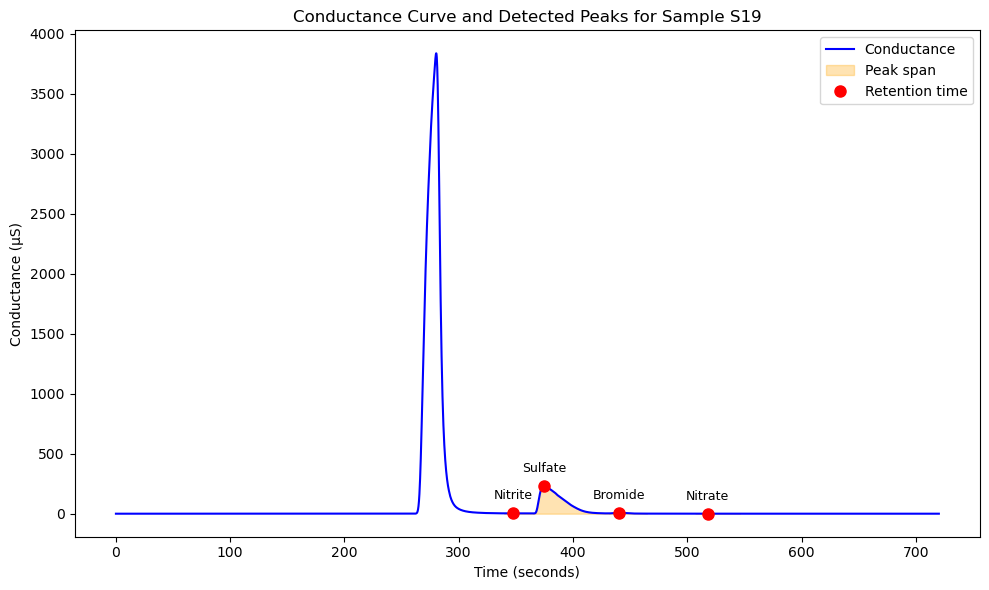

In [14]:
from dionexus.plotting import plot_sample_peaks

plot_sample_peaks(ds, sample="S19")


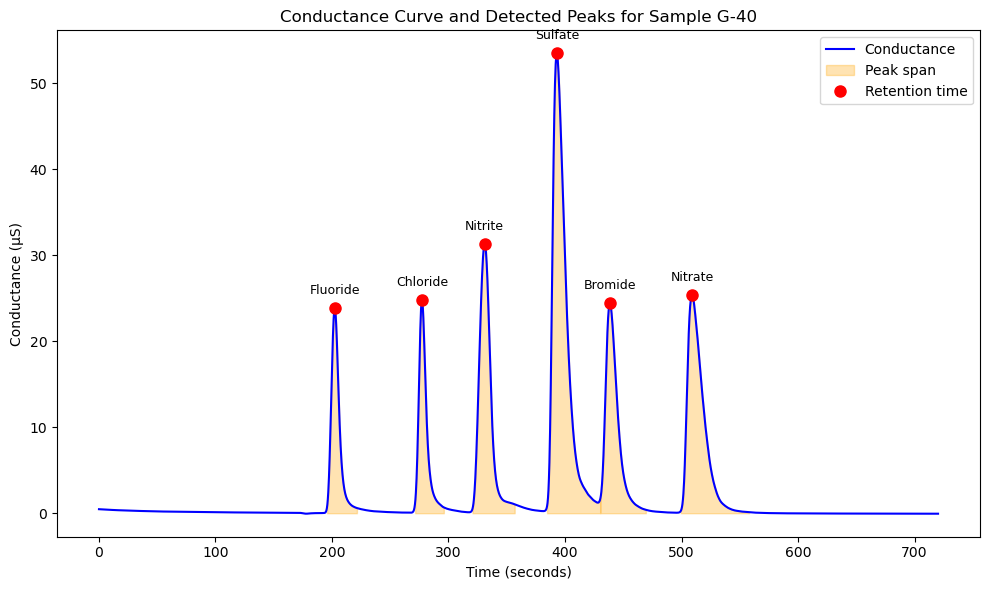

In [15]:
plot_sample_peaks(ds, sample="G-40")

In [16]:
from dionexus.peak_analysis import flag_peaks_by_asymmetry

# Example usage:
flagged = flag_peaks_by_asymmetry(ds, threshold=2.0)
print(flagged)


Sample B-100 has peaks [0, 1, 3] with asymmetry > 2.0.
Sample B-100_1 has peaks [0, 1, 3] with asymmetry > 2.0.
Sample B-50 has peaks [0, 1, 3] with asymmetry > 2.0.
Sample B-50_1 has peaks [0, 1, 3] with asymmetry > 2.0.
Sample BLANK has peaks [0] with asymmetry > 2.0.
Sample BLANK_1 has peaks [0] with asymmetry > 2.0.
Sample BLANK_2 has peaks [0] with asymmetry > 2.0.
Sample D1 has peaks [0, 1, 2, 3] with asymmetry > 2.0.
Sample D10 has peaks [0, 1, 2, 3, 4] with asymmetry > 2.0.
Sample D11 has peaks [0, 1, 3] with asymmetry > 2.0.
Sample D12 has peaks [0, 1, 2, 3] with asymmetry > 2.0.
Sample D13 has peaks [0, 1, 2, 3] with asymmetry > 2.0.
Sample D14 has peaks [1, 2, 3] with asymmetry > 2.0.
Sample D15 has peaks [0, 1, 2] with asymmetry > 2.0.
Sample D16 has peaks [0, 1, 2] with asymmetry > 2.0.
Sample D17 has peaks [0, 1, 3, 4] with asymmetry > 2.0.
Sample D18 has peaks [1, 2, 3] with asymmetry > 2.0.
Sample D19 has peaks [0, 1, 2, 3] with asymmetry > 2.0.
Sample D2 has peaks [0, 